In [1]:
library("openxlsx")
library("C50")

In [2]:
dataMovies <- read.xlsx(xlsxFile = "C:\\Users\\aftermath\\Documents\\CS-101\\NLP\\sentiment twitter\\Twitter-Sentiment-Analysis\\datamining x nlp.xlsx")

In [3]:
str(dataMovies)

'data.frame':	90 obs. of  12 variables:
 $ nama           : chr  "Avengers: Endgame" "Joker" "Captain Marvel" "The Lion King" ...
 $ genre          : chr  "Fantasy" "Drama" "Fantasy" "Drama" ...
 $ release_month  : chr  "April" "October" "March" "July" ...
 $ imdb           : num  85 88 69 70 76 76 65 70 74 75 ...
 $ rotten_tomatoes: num  94 69 78 53 90 90 60 40 60 91 ...
 $ metacritic     : num  78 59 64 55 73 69 67 43 53 71 ...
 $ google_user    : num  95 93 77 87 92 94 89 91 95 96 ...
 $ studio         : chr  "Marvel Studios" "Warner Bros Pictures" "Marvel Studios" "Walt Disney Pictures" ...
 $ distributor    : chr  "Walt Disney Studios Motion Pictures" "Warner Bros Pictures" "Walt Disney Studios Motion Pictures" "Walt Disney Studios Motion Pictures" ...
 $ sa_positive    : num  72 68 75 79 88 91 96 3 79 43 ...
 $ sa_negative    : num  27 31 24 20 11 8 3 96 20 56 ...
 $ interest_50    : num  3 6 3 3 4 5 4 4 4 4 ...


In [4]:
dataMovies$interest_50 <- as.factor(dataMovies$interest_50)
dataMovies$distributor <- as.factor(dataMovies$distributor)
dataMovies$genre <- as.factor(dataMovies$genre)
dataMovies$release_month <- as.factor(dataMovies$release_month)
dataMovies$studio <- as.factor(dataMovies$studio)

In [34]:
input_columns <- c("imdb","rotten_tomatoes","metacritic","google_user","studio","distributor","sa_positive","sa_negative","genre","release_month")
datafeed <-dataMovies[,input_columns]
str(datafeed$studio)

 Factor w/ 38 levels "20th Century Fox",..: 18 37 18 36 31 18 27 36 1 8 ...


In [76]:
#set.seed(100)
set.seed(393)
indeks_training_set <- sample(100, 90)

In [77]:
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataMovies[indeks_training_set,]$interest_50
input_testing_set <- datafeed[-indeks_training_set,]

In [78]:
model <- C5.0(input_training_set, class_training_set)

In [80]:
summary(model)


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 28 02:45:38 2019
-------------------------------

Class specified by attribute `outcome'
*** ignoring cases with bad or unknown class

Read 80 cases (11 attributes) from undefined.data

Decision tree:

studio in {20th Century Fox,New Line Cinema}: 2 (5/3)
studio in {Allspark Pictures,Chernin Entertainment,Columbia Pictures,
:          Original Film}: 6 (4)
studio in {CoMix Wave Films,DC Films,DreamWorks Pictures,Lucasfilm Ltd.,
:          Metro-Goldwyn-Mayer,Mythology Entertainment,Paramount Pictures,
:          Paramount Players,Screen Gems,SK Global Entertainment,
:          Skydance Media,Syncopy Inc,Warner Bros Pictures}: 3 (20/4)
studio in {DC Entertainment,DreamWorks Animation,Gravity Pictures,Hasbro,
:          K/O Paper Products,Next Entertainment World,Seven Bucks Productions,
:          StudioCanal,Summit Entertainment,TSG Entertainment,
:          Village Roadshow 

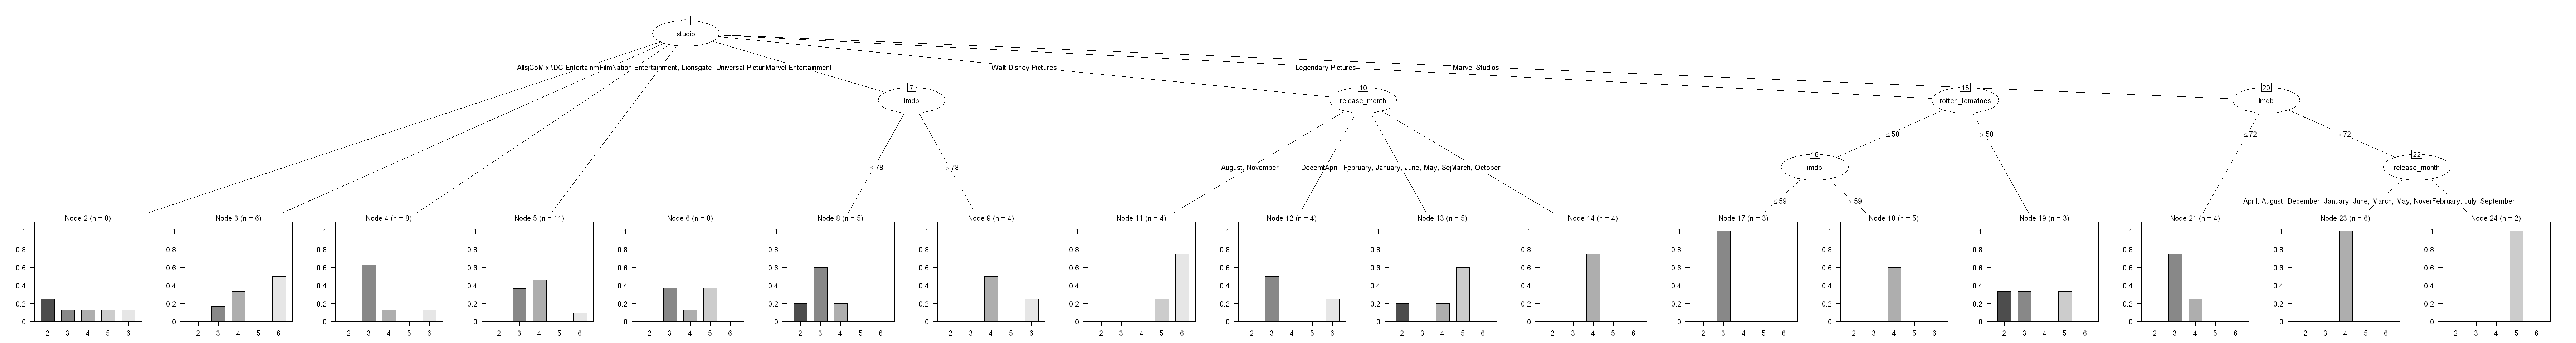

In [81]:
options(repr.plot.width=60, repr.plot.height=8)
plot(model)